In [1]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [2]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from 'vision_benchmarks.pyc'>

This next objective function tries to optimize the latencies between the AIT and PFC, the PFC and PMC, and the PMC to MC by varrying the value of the recursive connection between the comparison state and the result state and the result feedback connection.

The version of vision_benchmarks that this operation uses has the recursive connection strengths that were found in the hyperopt_vision file. 

In [3]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        result_feedback = x['result_feedback'],
        compare_to_result_strength = x['compare_to_result_strength']
    )
    return {
        'loss': 
            abs(vals['AIT_to_PFC'] - 0.03) + abs(vals['PFC_to_PMC'] - 0.02) + abs(vals['PMC_to_MC'] - 0.025),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {'compare_to_result_strength': hp.uniform('compare_to_result_strength', 0, 1),
                     'result_feedback': hp.uniform('result_feedback', 0, 1)
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('vision_and_other_hyperopt_data', 'w'))

running Vision_Model#20160721-142733-318595eb
Simulation finished in 0:00:27.                                                 
_runtime = 2
_result_feedback = 0.6964691855978616
_compare_to_result_strength = 0.28613933495037946
_D = 32
_motor_feedback = 0
_motor_transform = 10
_finger_feedback = 0.3
_motor_to_fingers_strength = 0.4
_AIT_V1_strength = 0.06848695023305285
_V1_r_transform = 0.11090645719111913
_AIT_r_transform = 0.8079719992231219
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
AIT_to_PFC = 0.022000000000000002
MC_to_finger = -0.0010000000000000009
PFC_to_PMC = 0.049000000000000002
PMC_to_MC = -0.050000000000000003
V1_to_AIT = 0.023
finger_to_end = 0.0090000000000000011
retina_to_V1 = 0.0050000000000000001
running Vision_Model#20160721-142819-67c7ca62
Simulation finished in 0:00:26.                                                 
_runtime = 2
_result_feedback = 0.10606490595473272
_compare_to_result_strength = 0.745471484885613
_D = 32
_motor_

In [70]:
print(best)

{'result_feedback': 0.4195086163487056, 'compare_to_result_strength': 0.12966085928477078}


In the next file, hyperopt_motor, the above numbers will be used for their corresponding connection strengths. 

In [71]:
data2 = pickle.load(open('vision_and_other_hyperopt_data','r'))

In [72]:
import pandas
import seaborn as sns

In [93]:
data2 = ctn_benchmark.Data('data')
df = pandas.DataFrame(data2.data)

In [95]:
df = df[df._AIT_V1_strength == 0.06848695023305285] 

I accidentally ended up storing all the data in one place, so the above command filters it so that we are only looking at the data produed by the latest iteration of hyperopt. 

In [96]:
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
0,0.022,0.001,0.029,-0.037,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.902062,2,1,0.005,0.005
1,0.022,0.003,0.011,-0.016,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.422709,2,1,0.005,0.005
2,0.022,0.006,0.006,-0.011,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.141630,2,1,0.006,0.005
8,0.022,0.000,0.000,-0.010,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.103662,2,1,0.006,0.005
10,0.022,0.005,0.020,-0.012,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.419509,2,1,0.006,0.005
11,0.022,0.001,0.033,-0.040,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.917385,2,1,0.005,0.005
12,0.022,0.038,0.054,-0.030,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.523833,2,1,0.037,0.005
15,0.022,0.001,0.041,-0.046,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.780904,2,1,0.006,0.005
19,0.022,0.002,0.037,-0.028,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.575406,2,1,0.005,0.005
20,0.022,0.002,0.011,-0.015,0.023,0.068487,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.360152,2,1,0.005,0.005


The following graphs examine the effect that changing the feedback connection between the result and compare states and the feedback connection in the result state has on the latencies that the objective function was optimizing for.

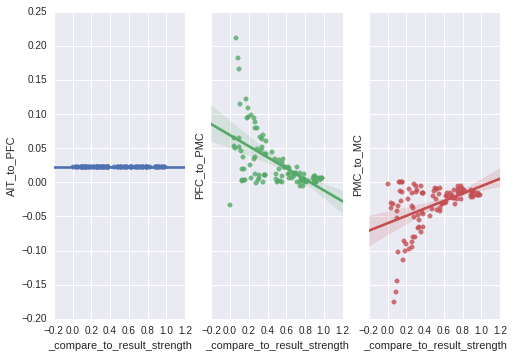

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_compare_to_result_strength'
sns.regplot(x, y = 'AIT_to_PFC', ax = ax1, data = df)
sns.regplot(x, y = 'PFC_to_PMC', ax = ax2, data = df)
sns.regplot(x, y = 'PMC_to_MC', ax = ax3, data = df)

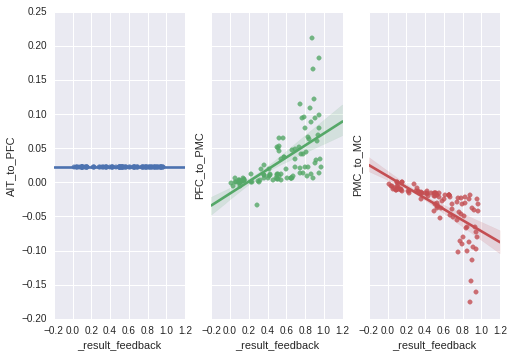

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_result_feedback'
sns.regplot(x, y = 'AIT_to_PFC', ax = ax1, data = df)
sns.regplot(x, y = 'PFC_to_PMC', ax = ax2, data = df)
sns.regplot(x, y = 'PMC_to_MC', ax = ax3, data = df)

The curves showing the relationship between feedback connection strength and the latencies in the PFC, PMC and MC seem to suggest exponential relationships, which I think is really cool! 